# THE PROBLEM STATEMENT 


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EXPLORATORY DATA ANALYSIS:

<Axes: >

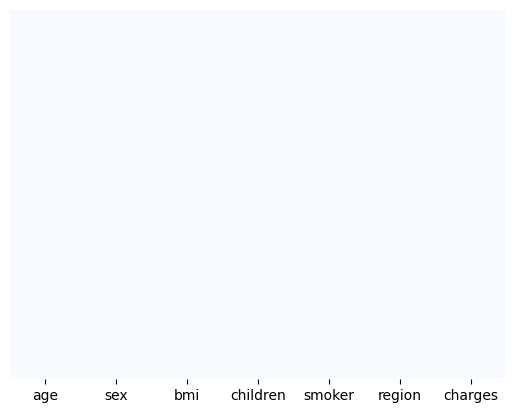

In [3]:
# Check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [4]:
# Check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Check the dataframe info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean(numeric_only=True)
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [7]:
# Grouping by age to see any relationship between age and charges

df_age = insurance_df.groupby(by='age').mean(numeric_only=True)
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [8]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
# Convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [10]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [11]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
# Convert categorical variable to numerical

insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [13]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
# region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
insurance_df = pd.get_dummies(insurance_df
               ,columns = ['region']
               ,drop_first = True)

In [19]:
insurance_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [21]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [22]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


# VISUALIZE DATASET

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

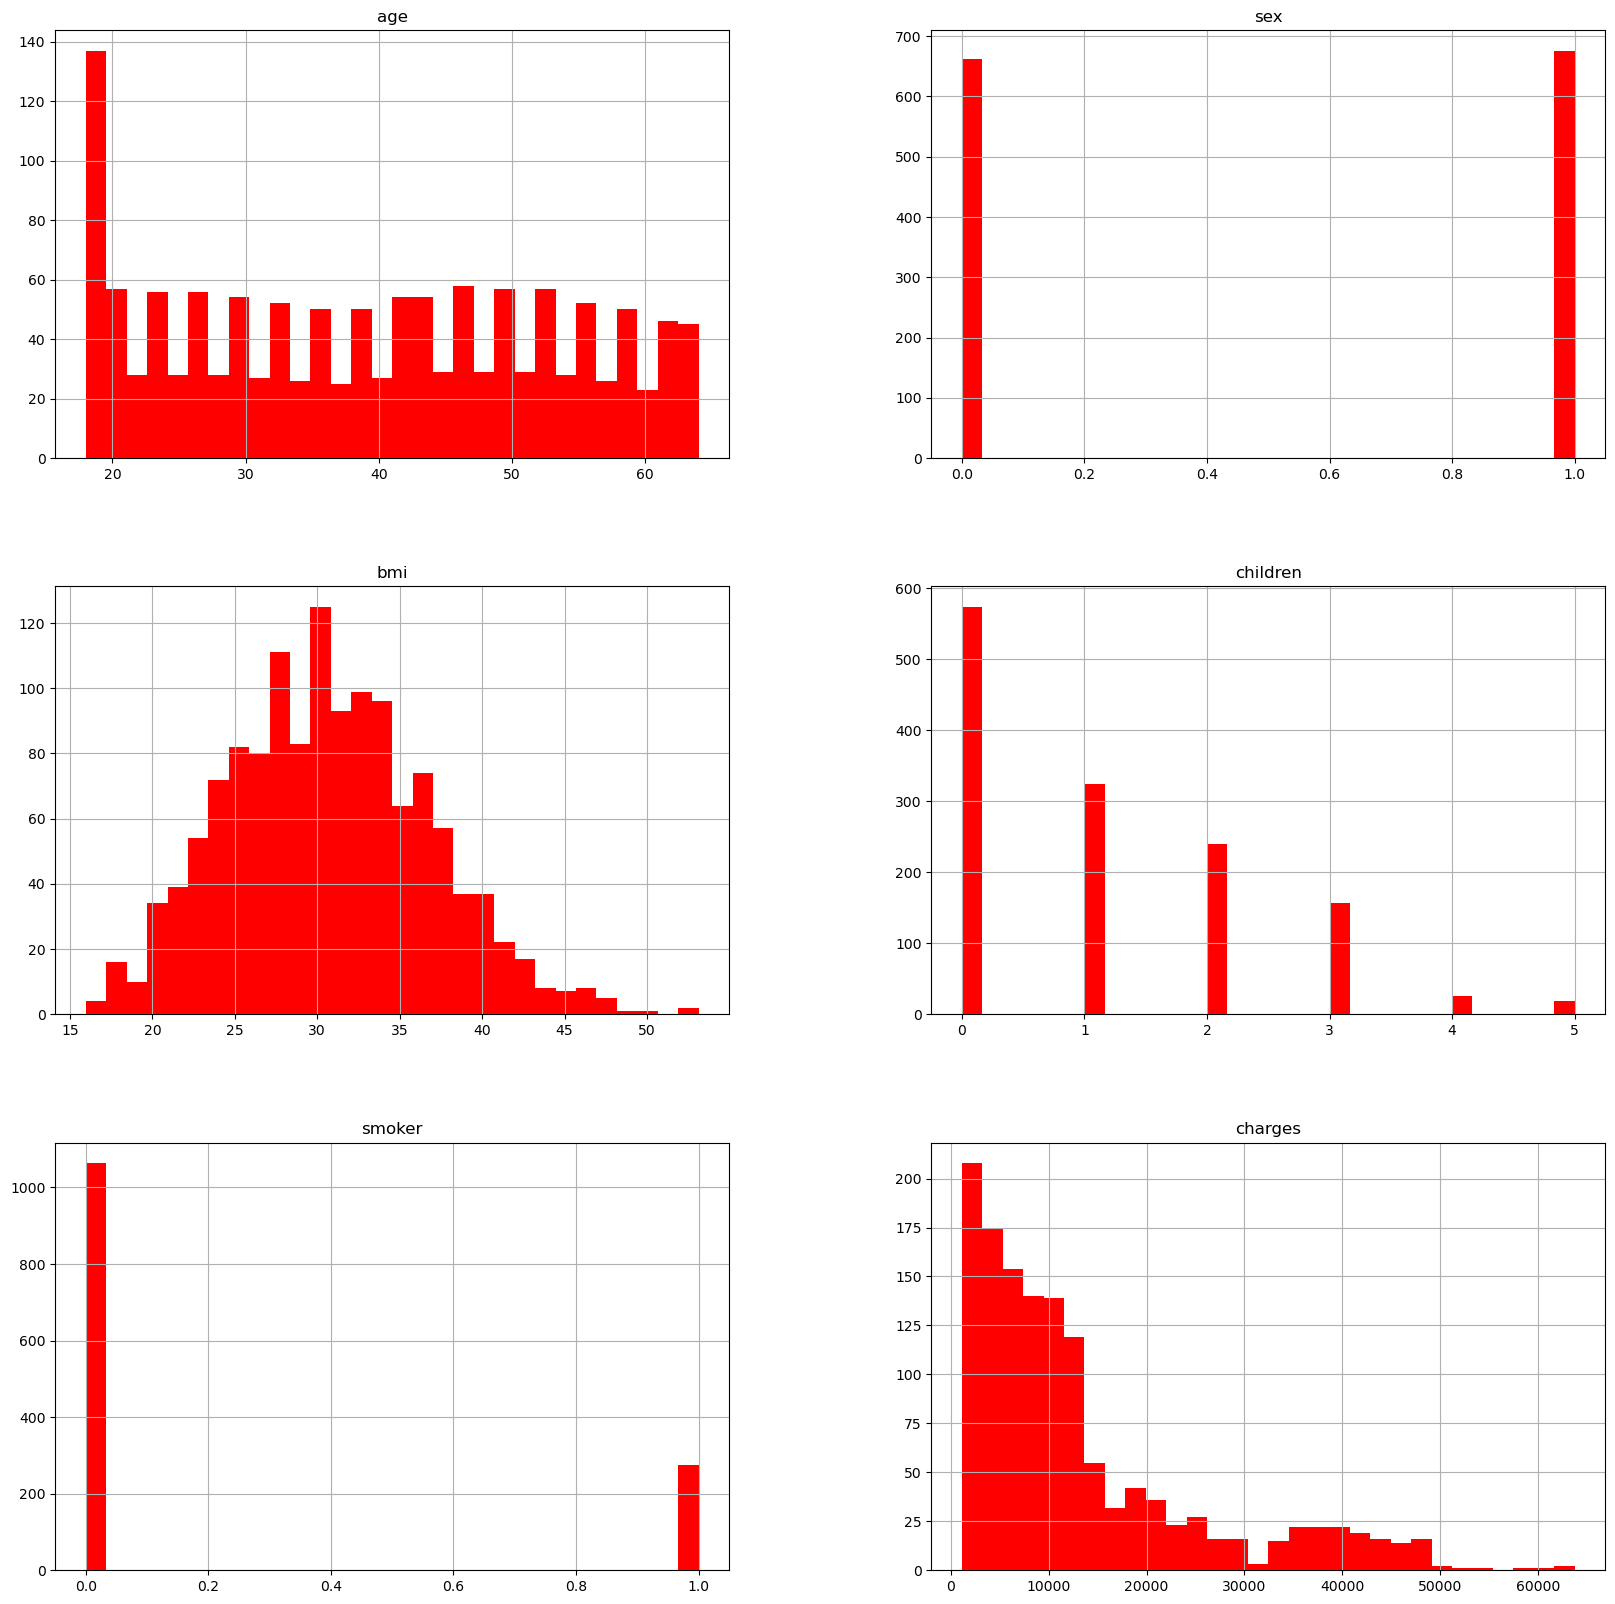

In [23]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')


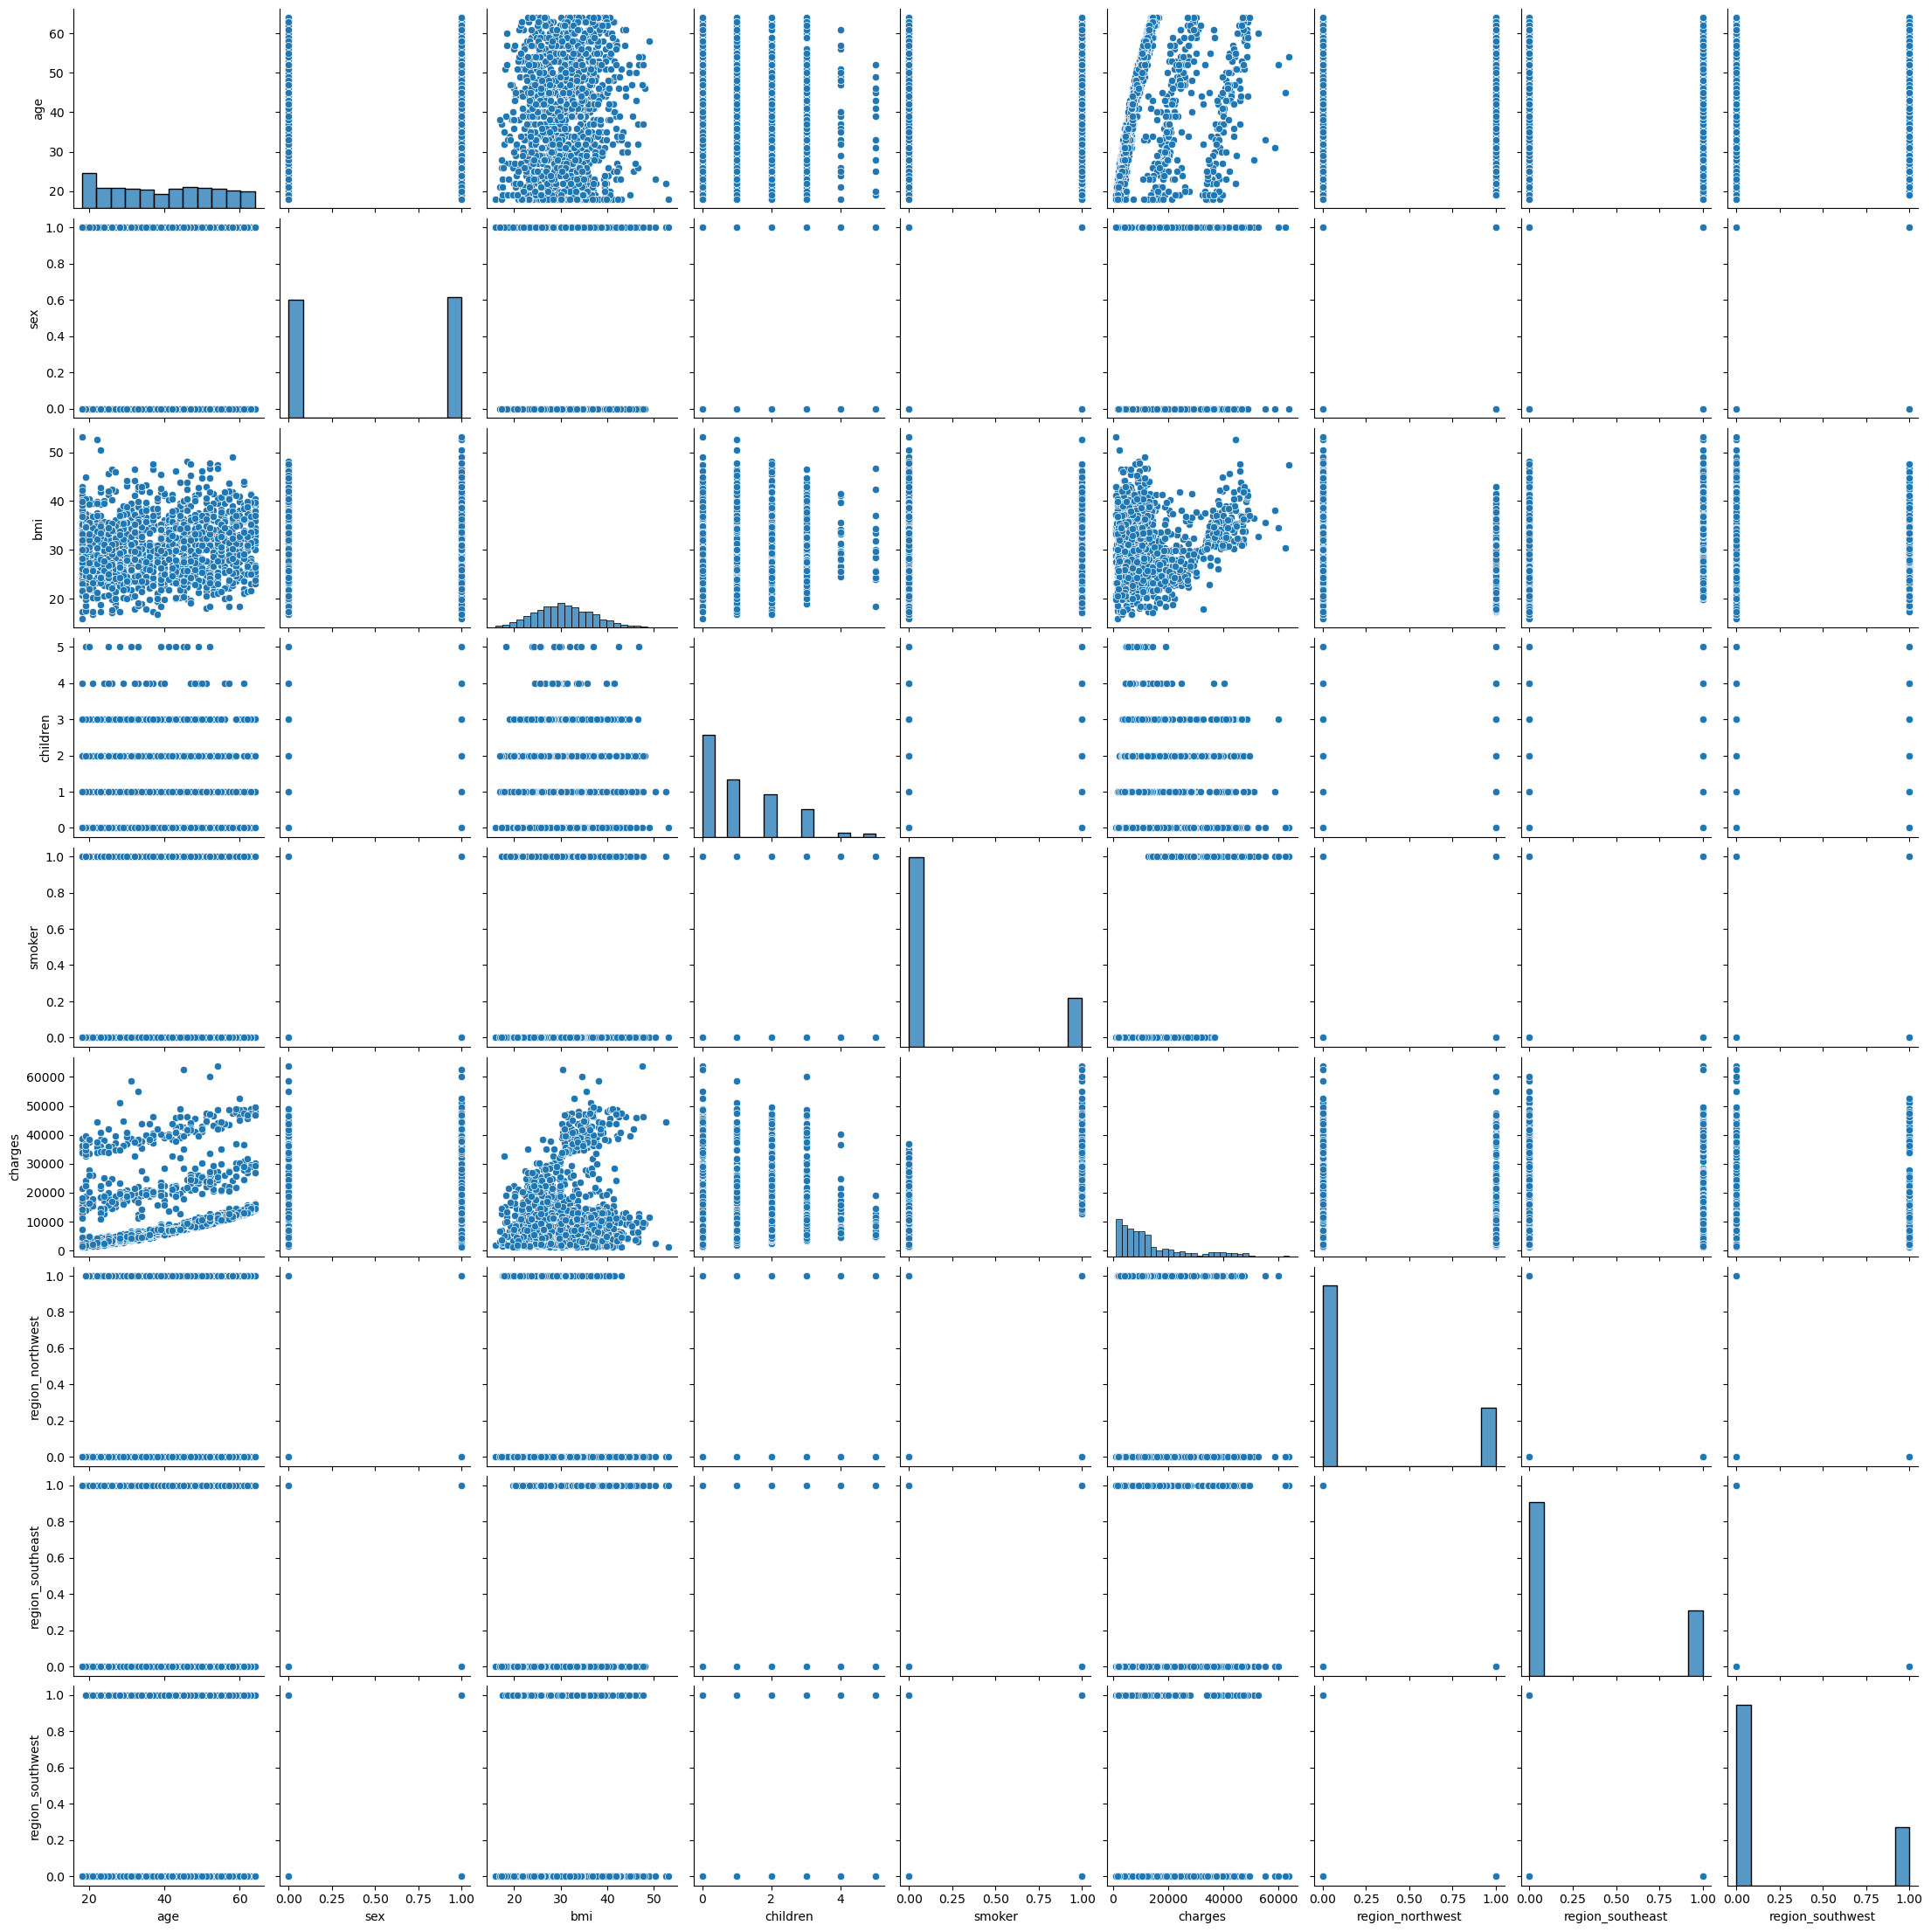

In [24]:
# plot pairplot

sns.pairplot(insurance_df)

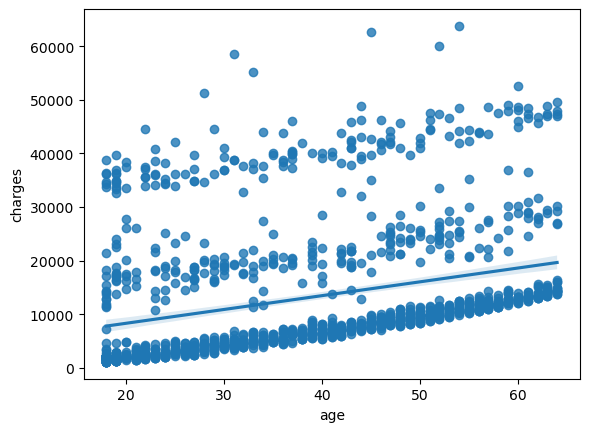

In [25]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

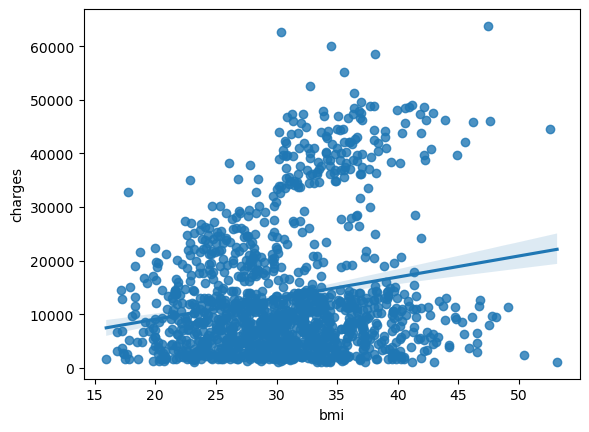

In [26]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

<Axes: >

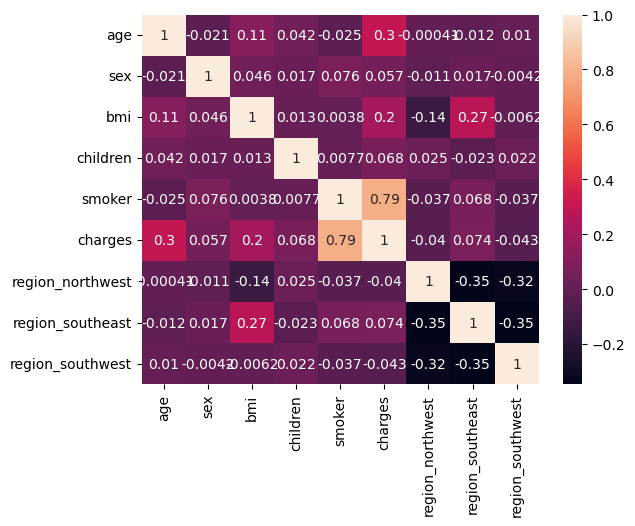

In [27]:
corr = insurance_df.corr()
sns.heatmap(corr, annot=True)

In [39]:
# smoker and age have positive correlations with charges

# CREATE TRAINING AND TESTING DATASET

In [28]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [29]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [30]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [31]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [32]:
X.shape

(1338, 8)

In [33]:
y.shape

(1338,)

In [34]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [35]:
y = y.reshape(-1,1)

In [36]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [38]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (WIHOUT SAGEMAKER BUILT-IN ALGORITHMS)

In [39]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [40]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929540980953

In [41]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [42]:
# scale back data to original format
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [43]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)


In [45]:
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [46]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5796.285 
MSE = 33596916.0 
MAE = 4181.195 
R2 = 0.7835929750179934 
Adjusted R2 = 0.7769085881459623


# TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [73]:
import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'sagemaker-projects-2024'
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::666663911149:role/service-role/AmazonSageMaker-ExecutionRole-20240307T162869


In [74]:
X_train.shape

(1070, 8)

In [75]:
y_train.shape

(1070, 1)

In [77]:
# y_train = y_train[:,0]

In [78]:
y_train.shape

(1070,)

In [79]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Convert the data in numpy array format to RecordIO format (required by Sagemaker Linear Learner)

buf = io.BytesIO() # create an in-memory byte array
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
# When writing to in-memory byte arrays, it increments 1 every time the write is performed to it
# Reset that back to zero 
buf.seek(0) 

0

In [80]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-projects-2024/linear_learner/train/linear-train-data


In [85]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-projects-2024/linear_learner/output


In [84]:
# This code is used to get the training container of sagemaker built-in algorithms
# the name of the algorithmto be used should be specified

# Obtain a reference to the linearLearner container image
# All regression models are named estimators

from sagemaker.image_uris import retrieve
container = retrieve("linear-learner", boto3.Session().region_name)


In [86]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       use_spot_instances = True,
                                       max_run = 300,
                                       max_wait = 600)


# Tune parameters like the number of features that are passed in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 100,
                           epochs = 100,
                           num_models = 32,
                           loss = 'absolute_loss')

# Pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# The progress can be monitored in cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-03-08-20-02-19-440


2024-03-08 20:02:19 Starting - Starting the training job...
2024-03-08 20:02:46 Starting - Preparing the instances for training......
2024-03-08 20:03:44 Downloading - Downloading the training image.........
2024-03-08 20:05:14 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/08/2024 20:05:21 INFO 140030541895488] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insen

MINI CHALLENGE
 - retrain the linear learner model using more epochs, more number of models. 
 - Experiment with a different loss function and report any improvement or degradation in results.

In [88]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       use_spot_instances = True,
                                       max_run = 300,
                                       max_wait = 600)



# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 1000,
                           epochs = 1000,
                           num_models = 50,
                           loss = 'squared_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

INFO:sagemaker:Creating training-job with name: linear-learner-2024-03-08-20-50-29-705


2024-03-08 20:50:29 Starting - Starting the training job...
2024-03-08 20:50:44 Starting - Preparing the instances for training......
2024-03-08 20:51:38 Downloading - Downloading input data...
2024-03-08 20:52:06 Downloading - Downloading the training image......
2024-03-08 20:53:27 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/08/2024 20:53:36 INFO 140378020452160] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

# DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [89]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-03-08-20-57-27-927
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-03-08-20-57-27-927
INFO:sagemaker:Creating endpoint with name linear-learner-2024-03-08-20-57-27-927


-------!

In [90]:
# for serializing data for an inference endpoint
from sagemaker.serializers import CSVSerializer

# for deserializing data returned from an inference endpoint
from sagemaker.deserializers import JSONDeserializer

from sagemaker.predictor import Predictor

predictor = Predictor(endpoint_name='linear-learner-2024-03-08-20-57-27-927',

                      sagemaker_session=Session(),

                      serializer=CSVSerializer(), # Serialize data to a CSV-formatted string

                      deserializer=JSONDeserializer())# Deserialize JSON data from an inference endpoint into a Python object.

In [93]:
# making prediction on the test data

result = predictor.predict(X_test)

In [94]:
result # results are in Json format

{'predictions': [{'score': -0.40923407673835754},
  {'score': -0.6174401044845581},
  {'score': 1.8186986446380615},
  {'score': -0.41758599877357483},
  {'score': 0.9333102703094482},
  {'score': -0.2943056523799896},
  {'score': -1.1954034566879272},
  {'score': 0.1836630403995514},
  {'score': -1.080676794052124},
  {'score': -0.2717173099517822},
  {'score': 1.1035783290863037},
  {'score': -0.4382384121417999},
  {'score': -0.7418333292007446},
  {'score': 1.9356794357299805},
  {'score': 2.0808160305023193},
  {'score': 1.8238084316253662},
  {'score': 0.09506870806217194},
  {'score': 1.749322772026062},
  {'score': -0.4087508022785187},
  {'score': 1.3557401895523071},
  {'score': -0.8407316207885742},
  {'score': -0.3331572115421295},
  {'score': -1.0050060749053955},
  {'score': -0.6033886671066284},
  {'score': -0.23545348644256592},
  {'score': -0.09082752466201782},
  {'score': 0.05576121807098389},
  {'score': -0.68077552318573},
  {'score': -0.32656288146972656},
  {'sco

In [95]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [96]:
predictions

array([-0.40923408, -0.6174401 ,  1.81869864, -0.417586  ,  0.93331027,
       -0.29430565, -1.19540346,  0.18366304, -1.08067679, -0.27171731,
        1.10357833, -0.43823841, -0.74183333,  1.93567944,  2.08081603,
        1.82380843,  0.09506871,  1.74932277, -0.4087508 ,  1.35574019,
       -0.84073162, -0.33315721, -1.00500607, -0.60338867, -0.23545349,
       -0.09082752,  0.05576122, -0.68077552, -0.32656288, -1.0406909 ,
       -0.37579525, -0.10561374, -0.81684577, -0.89755762, -0.81992018,
       -0.12598906, -0.99796331, -0.41820154,  1.52115893,  1.43845534,
       -0.81610942, -0.87812543,  0.028126  , -0.26349607, -0.47493175,
       -0.16009805, -0.76719737, -0.88344359,  1.69681311, -0.44754878,
        0.14778644, -1.01994181, -0.17902276, -1.09158826, -0.08681076,
       -0.14090058, -0.84504449,  1.38951719, -0.04247729, -0.09744123,
        0.03255527, -0.3118861 ,  0.20001775, -0.53829014, -0.18378666,
       -0.86280501,  0.98195899, -0.26760691, -1.02153373, -0.69

In [97]:
predictions.shape

(268,)

In [99]:
predictions = predictions.reshape(-1,1)
predictions.shape

(268, 1)

In [101]:
# Scale back the data to the original representation 
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5886.912 
MSE = 34655730.60902948 
MAE = 4016.19100748695 
R2 = 0.7767728581950888 
Adjusted R2 = 0.7698778113439718


In [103]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-03-08-20-57-27-927
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-03-08-20-57-27-927


# MORE COMPLEX ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [47]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.8 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.8 requires mkl, which is not installed.


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


2024-03-09 10:18:39.498094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 10:18:50.701206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [77]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                450       
                                                                 
 activation_12 (Activation)  (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 150)               7650      
                                                                 
 activation_13 (Activation)  (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_17 (Dense)            (None, 150)               22650     
                                                                 
 activation_14 (Activation)  (None, 150)              

In [78]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 0.4581 - val_loss: 0.2341
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2594 - val_loss: 0.1791
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2318 - val_loss: 0.1751
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2161 - val_loss: 0.1700
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2026 - val_loss: 0.1738
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2274 - val_loss: 0.2241
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1973 - val_loss: 0.1507
Epoch 8/100
43/43 [==============================] - 0s 11ms/step - loss: 0.1843 - val_loss: 0.1766
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1900 - val_loss: 0.1720
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1814 - val_loss: 0.1653
Epoch 11

In [79]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.1663
Accuracy : 0.8337049037218094


In [80]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

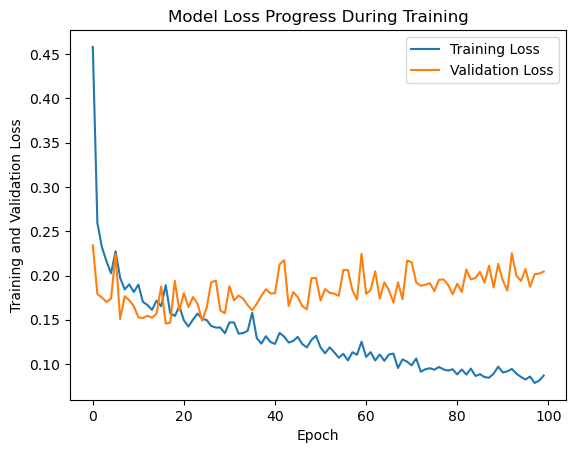

In [81]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

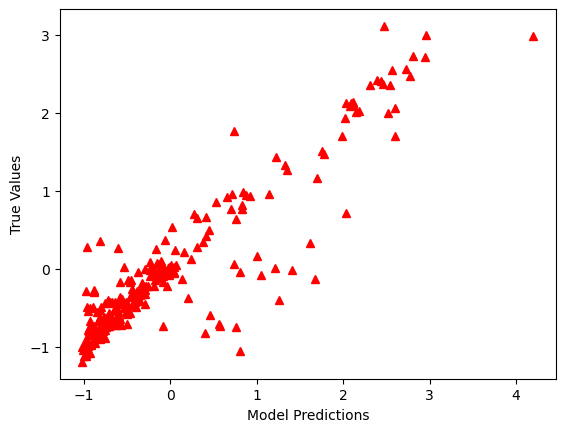

In [82]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [83]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

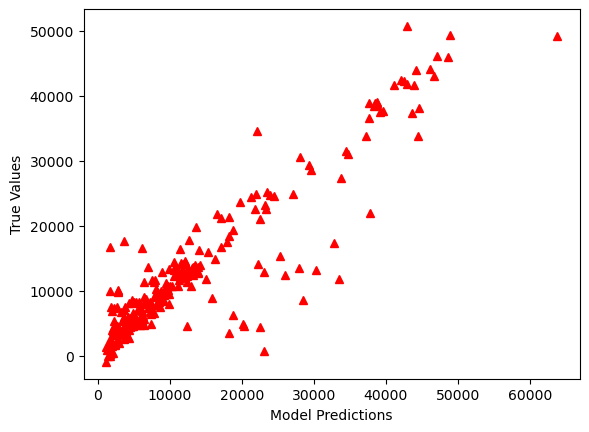

In [84]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [85]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4899.181 
MSE = 24001974.0 
MAE = 2701.385 
R2 = 0.8453966521457308 
Adjusted R2 = 0.8406212591618152
